In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import project
from project import project_framework as pf
from project import replace_with_nan
from project import fill_with_num
from project import fillAnimalFurniture

### Import data

In [3]:
df_ori = pd.read_csv("data/houses_to_rent_v2.csv")
pro = pf(df_ori)

In [4]:
pro.clean()

In [300]:
pro.data.describe()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),Campinas,Porto Alegre,Rio de Janeiro,São Paulo
count,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000
mean,146.592049,2.509607,2.237293,1.609655,6.566986,0.778325,0.245149,6.746850,7.951878,5.119832,3.683904,8.244256,0.080454,0.111879,0.139328,0.550876
std,484.283446,1.168106,1.402792,1.579588,4.603972,0.415393,0.430196,0.815252,0.787049,1.230260,0.773416,0.785933,0.272008,0.315232,0.346305,0.497428
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.988984,6.133398,1.386294,1.386294,6.230481,0.000000,0.000000,0.000000,0.000000
25%,57.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,6.175867,7.340187,4.317488,3.091042,7.638680,0.000000,0.000000,0.000000,0.000000
50%,90.000000,2.000000,2.000000,1.000000,6.583283,1.000000,0.000000,6.717822,7.897668,5.102552,3.610918,8.186743,0.000000,0.000000,0.000000,1.000000
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,7.317283,8.517393,5.968708,4.234107,8.820109,0.000000,0.000000,0.000000,1.000000
max,46335.000000,13.000000,10.000000,10.000000,51.000000,1.000000,1.000000,9.210440,10.308986,8.685754,6.113682,10.360311,1.000000,1.000000,1.000000,1.000000


In [301]:
pro.data.drop(pro.data[pro.data["total (R$)"] - pro.data["total (R$)"].mean() > 3 * pro.data["total (R$)"].std()].index, inplace=True)

In [302]:
pro.data[:10]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,São Paulo,70,2,1,1,7.000000,1,1,7.633370,8.101981,5.356586,3.761200,8.633909,0,0,0,1
1,São Paulo,320,4,4,0,20.000000,1,0,7.090910,8.509363,7.467942,4.158883,8.983942,0,0,0,1
2,Porto Alegre,80,1,1,1,6.000000,1,0,6.908755,7.937732,5.302083,3.737670,8.253748,0,1,0,0
3,Porto Alegre,51,2,1,0,2.000000,1,0,5.602119,7.014814,3.135494,2.890372,7.259820,0,1,0,0
4,São Paulo,25,1,1,0,1.000000,0,0,5.725338,6.685861,3.258097,2.484907,6.729824,0,0,0,1
5,São Paulo,376,3,3,7,6.583283,1,0,7.592154,8.987322,6.727432,4.804021,9.100079,0,0,0,1
6,Rio de Janeiro,72,2,1,0,7.000000,1,0,6.608001,7.550135,4.454347,3.258097,7.919720,0,0,1,0
7,São Paulo,213,4,4,4,4.000000,1,0,7.720905,8.078378,7.459339,3.737670,8.889308,0,0,0,1
8,São Paulo,152,2,2,1,3.000000,1,1,6.908755,9.615872,5.525453,5.257495,9.707533,0,0,0,1
9,Rio de Janeiro,35,1,1,0,2.000000,1,1,6.381816,7.741099,3.583519,3.433987,7.991592,0,0,1,0


### EDA

In [303]:
df_ori[:10]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


The coloumn floor has "-" as value that should be treated as missing value and replace it with mean.  
Deal with categorical data like city, animal, furniture.

In [304]:
df_ori.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


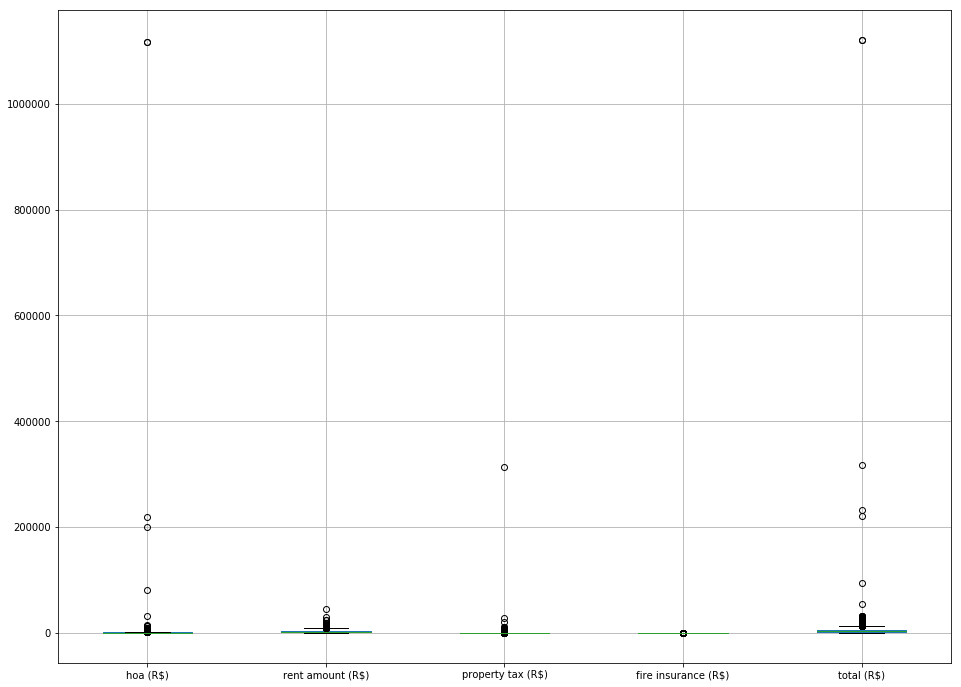

In [305]:
plt.figure(figsize=(16,12))
df_ori[["hoa (R$)", "rent amount (R$)", "property tax (R$)", "fire insurance (R$)", "total (R$)"]].boxplot()

There is some outliers in hoa, property tax and total far from the ordinary one, so we are just going to drop it.  
We are going  to drop the rows(greater than 200000)

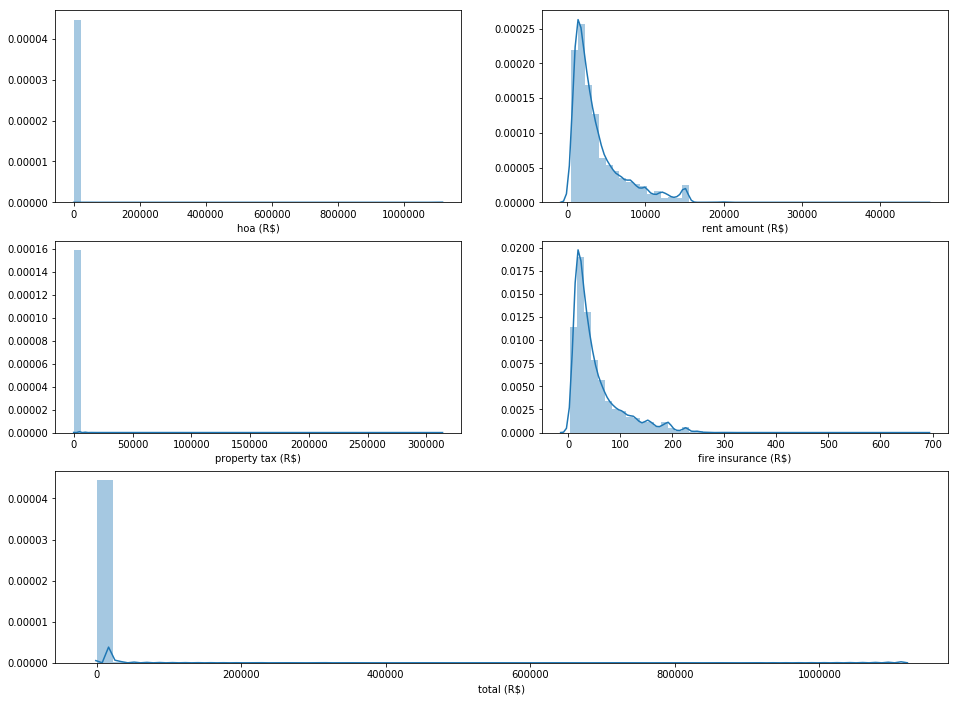

In [306]:
plt.figure(figsize=(16,12))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(313)

sns.distplot(df_ori["hoa (R$)"], ax=ax1)
sns.distplot(df_ori["rent amount (R$)"], ax=ax2)
sns.distplot(df_ori["property tax (R$)"], ax=ax3)
sns.distplot(df_ori["fire insurance (R$)"], ax=ax4)
sns.distplot(df_ori["total (R$)"], ax=ax5)

We also try to use log transformation to make the the distribution more Gaussian.

In [307]:
#pro.clean_1()

In [308]:
pro.data[:10]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,São Paulo,70,2,1,1,7.000000,1,1,7.633370,8.101981,5.356586,3.761200,8.633909,0,0,0,1
1,São Paulo,320,4,4,0,20.000000,1,0,7.090910,8.509363,7.467942,4.158883,8.983942,0,0,0,1
2,Porto Alegre,80,1,1,1,6.000000,1,0,6.908755,7.937732,5.302083,3.737670,8.253748,0,1,0,0
3,Porto Alegre,51,2,1,0,2.000000,1,0,5.602119,7.014814,3.135494,2.890372,7.259820,0,1,0,0
4,São Paulo,25,1,1,0,1.000000,0,0,5.725338,6.685861,3.258097,2.484907,6.729824,0,0,0,1
5,São Paulo,376,3,3,7,6.583283,1,0,7.592154,8.987322,6.727432,4.804021,9.100079,0,0,0,1
6,Rio de Janeiro,72,2,1,0,7.000000,1,0,6.608001,7.550135,4.454347,3.258097,7.919720,0,0,1,0
7,São Paulo,213,4,4,4,4.000000,1,0,7.720905,8.078378,7.459339,3.737670,8.889308,0,0,0,1
8,São Paulo,152,2,2,1,3.000000,1,1,6.908755,9.615872,5.525453,5.257495,9.707533,0,0,0,1
9,Rio de Janeiro,35,1,1,0,2.000000,1,1,6.381816,7.741099,3.583519,3.433987,7.991592,0,0,1,0


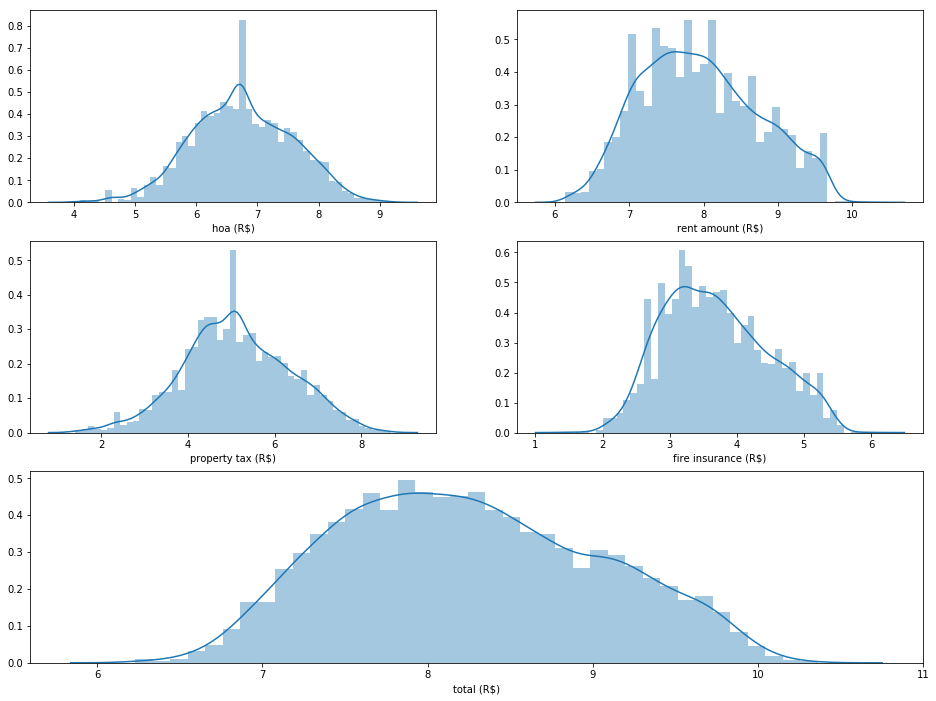

In [309]:
plt.figure(figsize=(16,12))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(313)

sns.distplot(pro.data["hoa (R$)"], ax=ax1)
sns.distplot(pro.data["rent amount (R$)"], ax=ax2)
sns.distplot(pro.data["property tax (R$)"], ax=ax3)
sns.distplot(pro.data["fire insurance (R$)"], ax=ax4)
sns.distplot(pro.data["total (R$)"], ax=ax5)

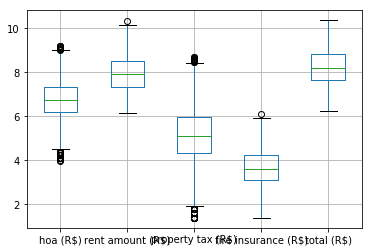

In [310]:
pro.data[["hoa (R$)", "rent amount (R$)", "property tax (R$)", "fire insurance (R$)", "total (R$)"]].boxplot()

In [311]:
cities = pro.data['city'].unique()
cities

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

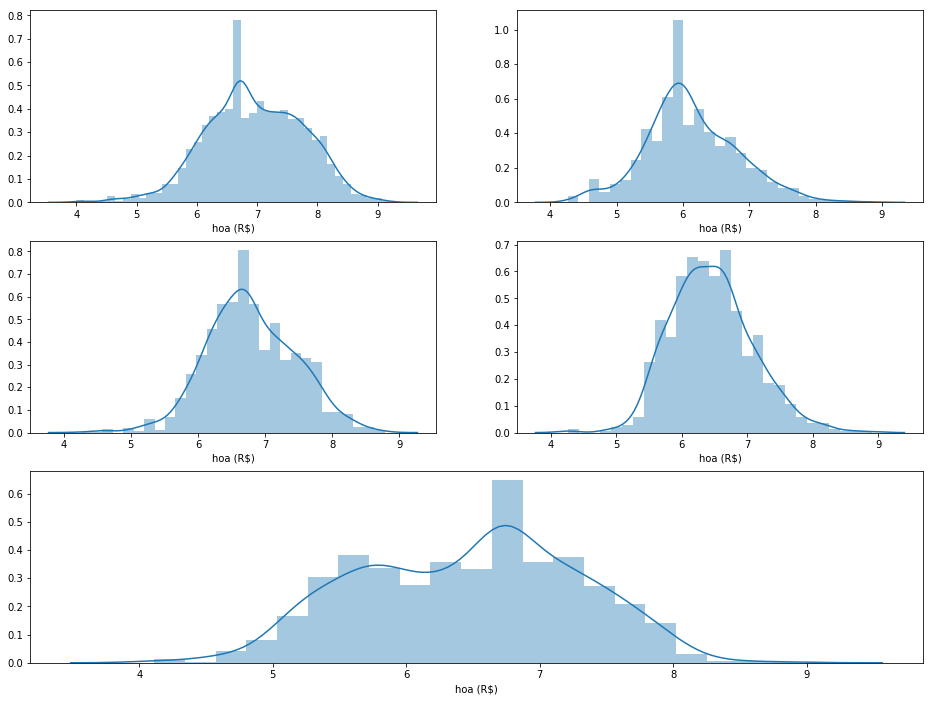

In [312]:
plt.figure(figsize=(16,12))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(313)


sns.distplot(pro.data[pro.data["city"] == cities[0]]["hoa (R$)"], ax=ax1)
sns.distplot(pro.data[pro.data["city"] == cities[1]]["hoa (R$)"], ax=ax2)
sns.distplot(pro.data[pro.data["city"] == cities[2]]["hoa (R$)"], ax=ax3)
sns.distplot(pro.data[pro.data["city"] == cities[3]]["hoa (R$)"], ax=ax4)
sns.distplot(pro.data[pro.data["city"] == cities[4]]["hoa (R$)"], ax=ax5)

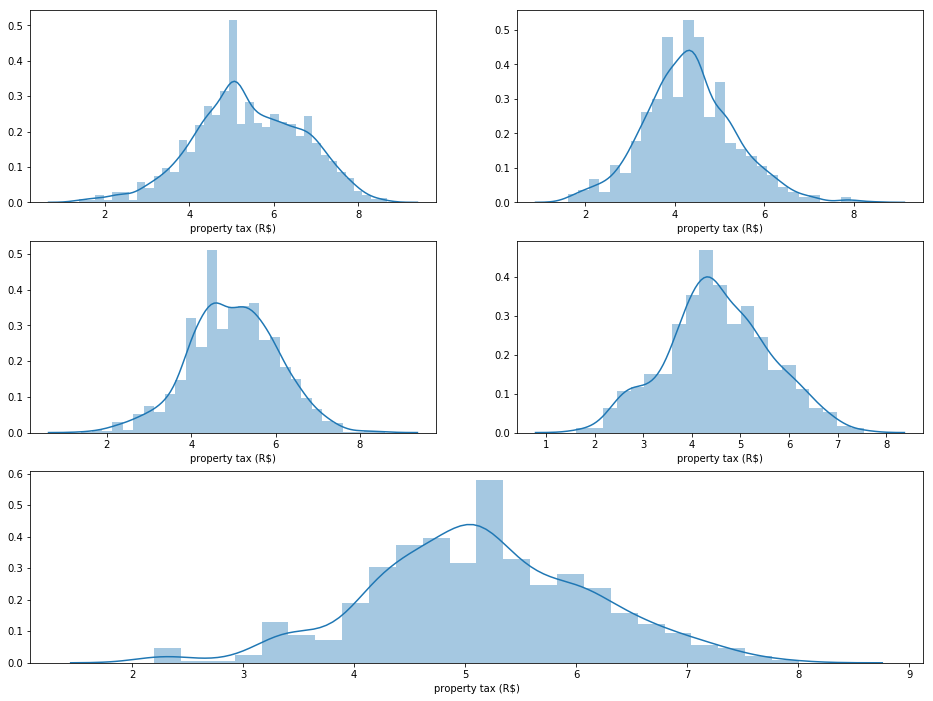

In [313]:
plt.figure(figsize=(16,12))

ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(313)


sns.distplot(pro.data[pro.data["city"] == cities[0]]["property tax (R$)"], ax=ax1)
sns.distplot(pro.data[pro.data["city"] == cities[1]]["property tax (R$)"], ax=ax2)
sns.distplot(pro.data[pro.data["city"] == cities[2]]["property tax (R$)"], ax=ax3)
sns.distplot(pro.data[pro.data["city"] == cities[3]]["property tax (R$)"], ax=ax4)
sns.distplot(pro.data[pro.data["city"] == cities[4]]["property tax (R$)"], ax=ax5)

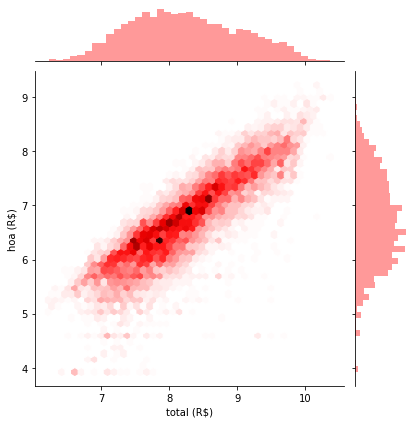

In [4]:
sns.jointplot(pro.data['total (R$)'], pro.data["hoa (R$)"], kind="hex", color="r")

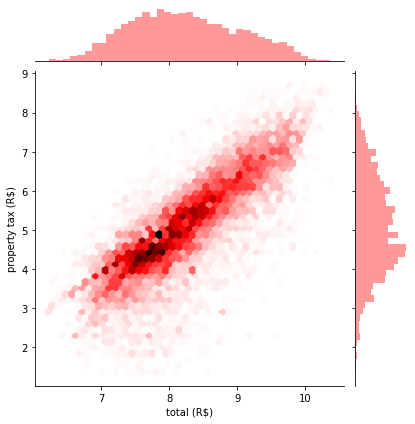

In [5]:
sns.jointplot(pro.data['total (R$)'], pro.data["property tax (R$)"], kind="hex", color="r")

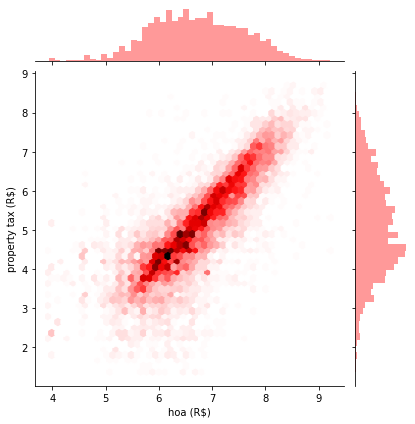

In [6]:
sns.jointplot(pro.data['hoa (R$)'], pro.data["property tax (R$)"], kind="hex", color="r")

In [317]:
hoa_miss_percent = pro.data[pro.data["hoa (R$)"] == 0]["hoa (R$)"].count()/pro.data["hoa (R$)"].count()
tax_miss_percent = pro.data[pro.data["property tax (R$)"] == 0]["property tax (R$)"].count()/pro.data["property tax (R$)"].count()
print("The percentage of missing hoa", hoa_miss_percent)
print("The percentage of missing property tax", tax_miss_percent)

The percentage of missing hoa 0.0
The percentage of missing property tax 0.0


So we are going to drop the attribute that has more than 20 percent of miss values.

In [318]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [319]:
pro.data["property tax (R$)"] = pro.data["property tax (R$)"].apply(lambda x: replace_with_nan(x, 0))
pro.data["hoa (R$)"] = pro.data["hoa (R$)"].apply(lambda x: replace_with_nan(x, 0))

In [320]:
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(pro.data[["property tax (R$)", "hoa (R$)"]])

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [321]:
tax = imp_mean.transform(pro.data[["property tax (R$)", "hoa (R$)"]])[:, 0]
hoa = imp_mean.transform(pro.data[["property tax (R$)", "hoa (R$)"]])[:, 1]

In [322]:
pro.data["property tax (R$)"] = tax
pro.data["hoa (R$)"] = hoa

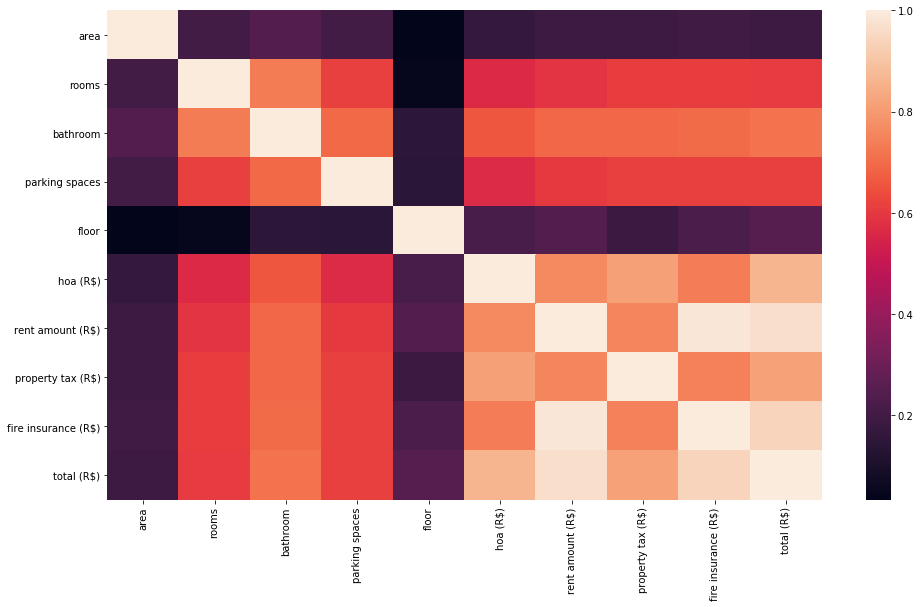

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(pro.data[["area", "rooms", "bathroom", "parking spaces", "floor", "hoa (R$)", "rent amount (R$)", "property tax (R$)",
                    "fire insurance (R$)", "total (R$)"]].corr())

### Apply ML

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [326]:
clf = LinearRegression()
regressor = DecisionTreeRegressor(random_state=0)

In [327]:
cross_validate(clf, pro.data[["area","rooms","bathroom","parking spaces","hoa (R$)","rent amount (R$)","property tax (R$)","fire insurance (R$)"]], pro.data["total (R$)"])

{'fit_time': array([0.00372982, 0.00241995, 0.00260186, 0.00290298, 0.00262904]),
 'score_time': array([0.00157309, 0.00111389, 0.00115728, 0.00134087, 0.001261  ]),
 'test_score': array([0.97011904, 0.9696717 , 0.97149868, 0.97034022, 0.96724361])}

In [328]:
cross_validate(regressor, pro.data[["area","rooms","bathroom","parking spaces","hoa (R$)","rent amount (R$)","property tax (R$)","fire insurance (R$)"]], pro.data["total (R$)"])

{'fit_time': array([0.03995991, 0.04216504, 0.03709316, 0.03974199, 0.0362339 ]),
 'score_time': array([0.00159693, 0.00208306, 0.0017271 , 0.00195575, 0.00270796]),
 'test_score': array([0.98703643, 0.98629374, 0.98613999, 0.98532747, 0.98753191])}

### K-means

In [329]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [330]:
range_n_clusters = [2, 3, 4, 5, 6]
X = pro.data[["area", "hoa (R$)"]]

For n_clusters = 2 The average silhouette_score is : 0.9971438356171413
For n_clusters = 3 The average silhouette_score is : 0.9898523099947001
For n_clusters = 4 The average silhouette_score is : 0.7097323509548957
For n_clusters = 5 The average silhouette_score is : 0.6816009580479978
For n_clusters = 6 The average silhouette_score is : 0.6408037237251485


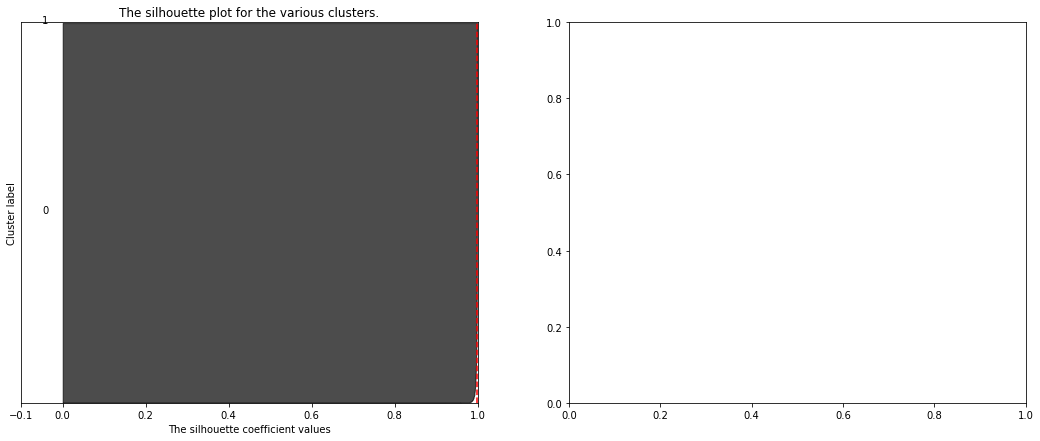

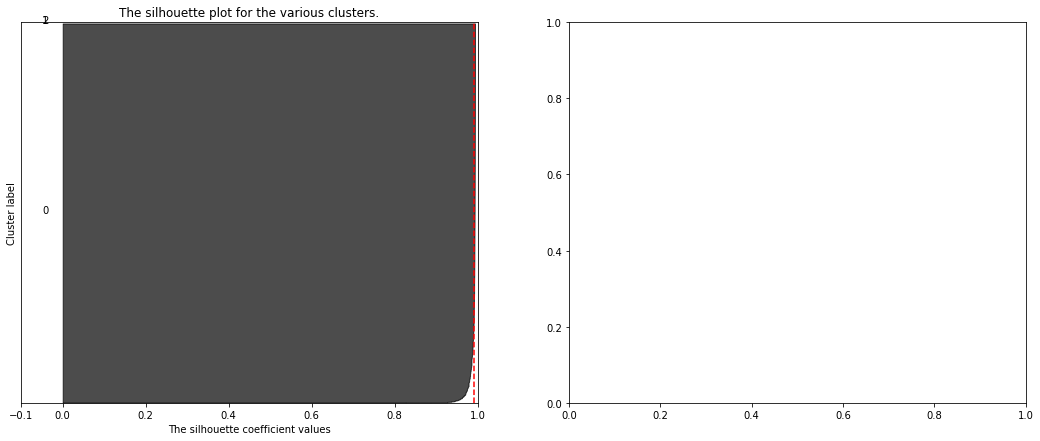

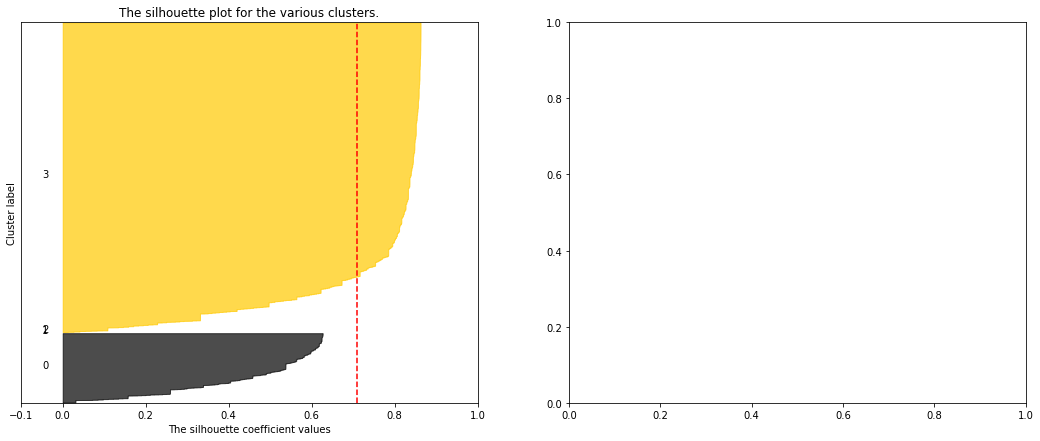

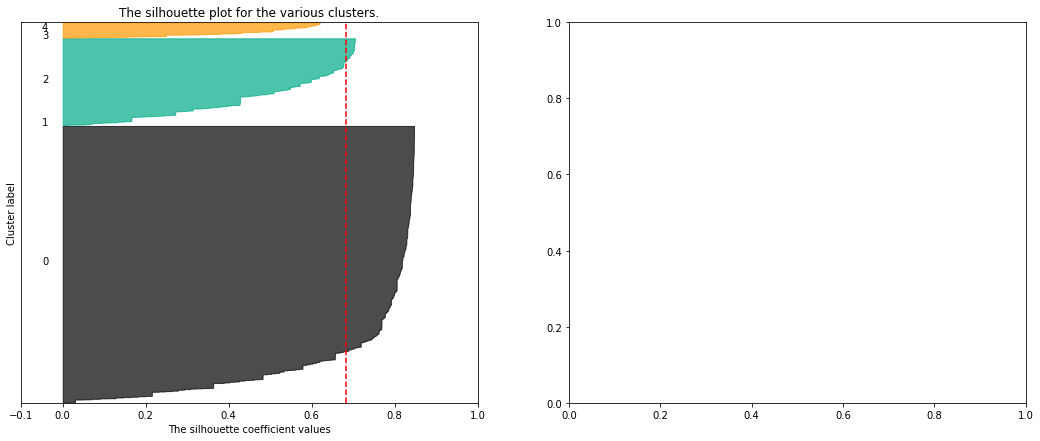

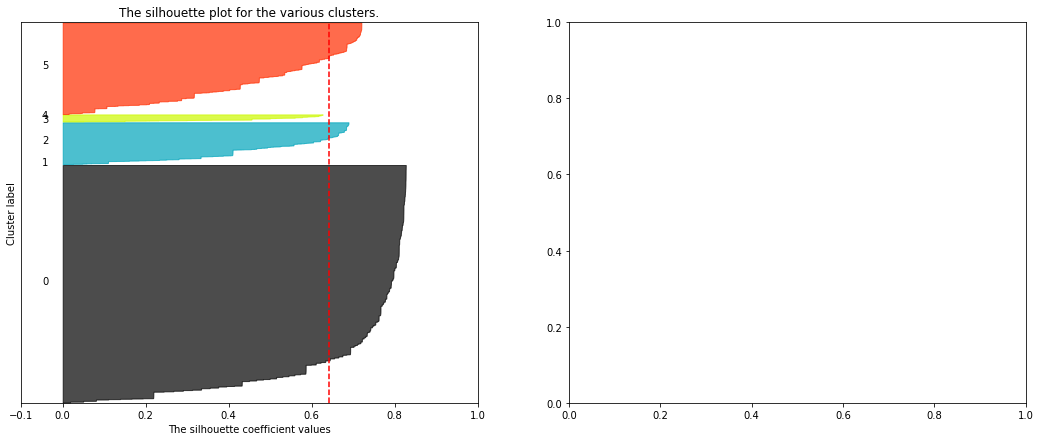

In [331]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], pro.data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

# PCR

In [361]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [362]:
X_train, X_test, y_train, y_test = train_test_split(pro.data.drop(columns = ["city", 'animal', 'furniture','Campinas','Porto Alegre', 'Rio de Janeiro', 'São Paulo', "total (R$)"]), pro.data["total (R$)"], test_size=0.5)
pcaMod = PCA(2)
pcaMod.fit(X_train)
g_train = X_train @ pcaMod.components_.T
linMod = LinearRegression(fit_intercept=True)
linMod.fit(X = g_train, y = y_train)
g_test = X_test @ pcaMod.components_.T
print("Coefficient")
print(linMod.intercept_, linMod.coef_)
print("MSE: ")
print(np.mean(np.square(linMod.predict(g_test) - y_test)))

Coefficient
7.796707129533836 [0.00018008 0.05193105]
MSE: 
0.5386598169817317


In [364]:
max(g_train[0])

46334.99946894152

# PCA

Since there some features are binary values 0 or 1, we will kick them out from the data, then create a new data called X.


In [332]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import  PCA

In [333]:
X_columns = ["area", "rooms", "bathroom", "parking spaces", "floor", "hoa (R$)", 
             "rent amount (R$)","property tax (R$)","fire insurance (R$)"]
X = pro.data.loc[:,X_columns]
X.head()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,70,2,1,1,7.0,7.633370,8.101981,5.356586,3.761200
1,320,4,4,0,20.0,7.090910,8.509363,7.467942,4.158883
2,80,1,1,1,6.0,6.908755,7.937732,5.302083,3.737670
3,51,2,1,0,2.0,5.602119,7.014814,3.135494,2.890372
4,25,1,1,0,1.0,5.725338,6.685861,3.258097,2.484907


In [334]:
#Normalize X for PCA
X = StandardScaler().fit_transform(X)
pca_model = PCA(n_components=5)
pca = pca_model.fit_transform(X)

In [335]:
pca_model.explained_variance_

array([5.13789843, 1.02766711, 0.92107252, 0.61610269, 0.48918721])

Text(0.5, 0, 'Principal Components')

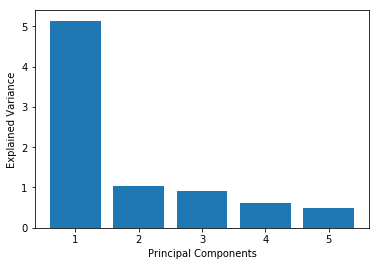

In [336]:
plt.bar(range(1, len(pca_model.explained_variance_)+1), pca_model.explained_variance_)
plt.ylabel("Explained Variance")
plt.xlabel("Principal Components")

(-10, 5)

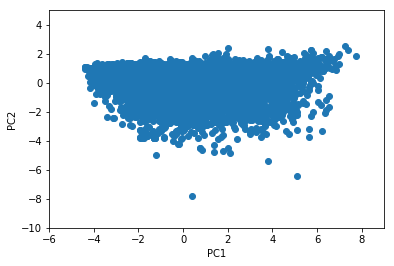

In [337]:
plt.scatter(pca[:,0], pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-6, 9)
plt.ylim(-10,5)

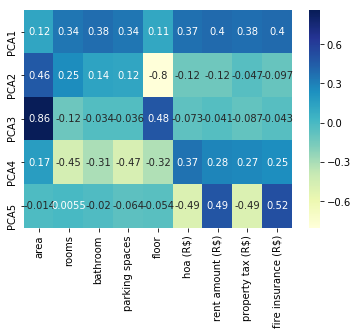

In [338]:

ax = sns.heatmap(pca_model.components_,
                 annot=True,
                 cmap="YlGnBu",
                 yticklabels=[ "PCA" + str(x) for x in range(1,pca_model.n_components_+1)],
                 xticklabels= X_columns)

In [339]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
   
    plt.grid()

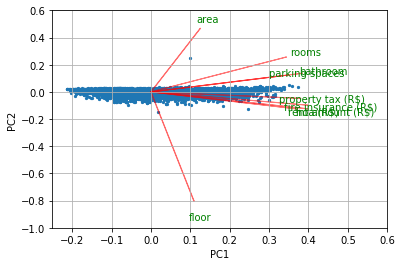

In [340]:
myplot(pca[:,0:2],np.transpose(pca_model.components_[0:2, :]),X_columns)
plt.xlim(-0.25,0.6)
plt.ylim(-1,0.6)
plt.show()

# Random Forests

We need to remove "city" this feature from the dataset, because its values are encoded and merged into the dataset.

In [341]:

pro.data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)', 'Campinas',
       'Porto Alegre', 'Rio de Janeiro', 'São Paulo'],
      dtype='object')

In [342]:
pro.data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,São Paulo,70,2,1,1,7.0,1,1,7.633370,8.101981,5.356586,3.761200,8.633909,0,0,0,1
1,São Paulo,320,4,4,0,20.0,1,0,7.090910,8.509363,7.467942,4.158883,8.983942,0,0,0,1
2,Porto Alegre,80,1,1,1,6.0,1,0,6.908755,7.937732,5.302083,3.737670,8.253748,0,1,0,0
3,Porto Alegre,51,2,1,0,2.0,1,0,5.602119,7.014814,3.135494,2.890372,7.259820,0,1,0,0
4,São Paulo,25,1,1,0,1.0,0,0,5.725338,6.685861,3.258097,2.484907,6.729824,0,0,0,1


In [343]:
data = pro.data.drop("total (R$)", axis = 1)
X = data.iloc[:,1:]
y = pro.data["total (R$)"]

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7923, 15) (7923,)
(2642, 15) (2642,)


In [345]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 552)

In [346]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=552, verbose=0, warm_start=False)

## Prediction

In [347]:
predictions = rf.predict(X_test)

In [348]:
from sklearn import metrics

In [349]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))

Mean Squared Error: 0.00383858299544312


## Importances

In [350]:
importances = list(rf.feature_importances_)
feature_list = X_train.columns
feature_importances = [(feature, importance, 2) for feature, importance in zip(feature_list, importances)]

In [351]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [352]:
['Variable: {:20} Importance: {}'.format(*pair) for pair in feature_importances]

['Variable: rent amount (R$)     Importance: 0.9284185901316523',
 'Variable: hoa (R$)             Importance: 0.056500356901164825',
 'Variable: fire insurance (R$)  Importance: 0.005127635095897566',
 'Variable: property tax (R$)    Importance: 0.004390415613283282',
 'Variable: area                 Importance: 0.001793650185538958',
 'Variable: floor                Importance: 0.001250853217924546',
 'Variable: São Paulo            Importance: 0.0006849144816617667',
 'Variable: parking spaces       Importance: 0.0005221138388407804',
 'Variable: Porto Alegre         Importance: 0.0005067042300141458',
 'Variable: rooms                Importance: 0.00021828468933062477',
 'Variable: bathroom             Importance: 0.00021240943150839834',
 'Variable: Rio de Janeiro       Importance: 0.00010647670592397328',
 'Variable: Campinas             Importance: 0.00010616797867327187',
 'Variable: animal               Importance: 9.36488308287399e-05',
 'Variable: furniture            Import

Text(0.5, 1.0, 'Variable Importances')

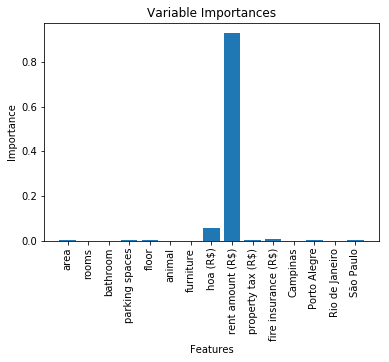

In [353]:
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Variable Importances')

## Training RF with most second importances

In [354]:
new_X_train = X_train.loc[:,["rent amount (R$)","hoa (R$)"]]
new_X_test = X_test.loc[:,["rent amount (R$)","hoa (R$)"]]
rf.fit(new_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=552, verbose=0, warm_start=False)

In [355]:
predictions2 = rf.predict(new_X_test)

In [356]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions2))

Mean Squared Error: 0.010034081507780986


## Training RF with most importance

In [358]:
new_X_train2 = X_train.loc[:,"rent amount (R$)"]
new_X_test2 = X_test[["rent amount (R$)"]]
new_X_train2 = pd.DataFrame(new_X_train2)
rf.fit(new_X_train2, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=552, verbose=0, warm_start=False)

In [359]:
predictions3 = rf.predict(new_X_test2)

In [360]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions3))

Mean Squared Error: 0.03996860267813108


# Linear Regression and Principal Components Regression

In [30]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [98]:
#Splitting data
X = pro.data.drop(columns = ["city","total (R$)"])
y = pro.data["total (R$)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state = 9)

## Linear Regression

Coefficient: 
-0.6827100003142821 [-1.09018697e-04 -1.50481295e-03  1.45050178e-02 -2.46848332e-03
  1.46219809e-03  1.59061095e-02  2.13037744e-02  2.24537379e-01
  1.04969626e+00  3.80784376e-02 -3.14827130e-01  5.11309773e-03
  6.74811834e-02  2.73901148e-02 -2.17050910e-02]
MSE: 
0.016401603942938252
Variance: 
0.01639776961495554
variance on test set: 
0.6198577729156837
R^2: 
0.9735459159641997


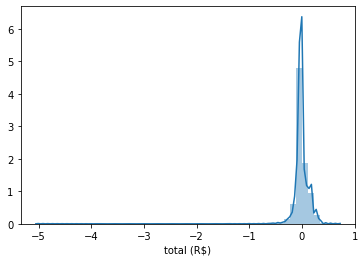

In [99]:
linMod = LinearRegression(fit_intercept = True)
linMod.fit(X = X_train, y = y_train)
print("Coefficient: ")
print(linMod.intercept_, linMod.coef_)
print("MSE: ")
print(np.mean(np.square(linMod.predict(X_test) - y_test)))
print("Variance: ")
print(np.var(linMod.predict(X_test) - y_test))
print("variance on test set: ")
print(np.var(y_test))
print("R^2: ")
print(1- np.var(linMod.predict(X_test) - y_test) / np.var(y_test))
sns.distplot(linMod.predict(X_test) - y_test)

## PCA 

Text(0.5, 0, 'Principal Components')

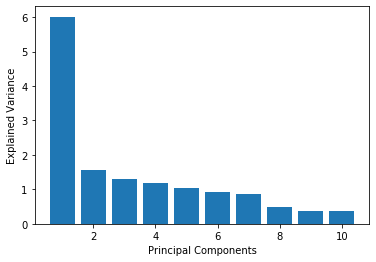

In [96]:
X_norm = StandardScaler().fit_transform(X_train)
pcaMod = PCA(n_components=10)
pca = pcaMod.fit_transform(X_norm)
plt.bar(range(1, len(pcaMod.explained_variance_)+1),\
        pcaMod.explained_variance_)
plt.ylabel("Explained Variance")
plt.xlabel("Principal Components")

## PCR

Coefficient: 
3.7375984706874874 [ 0.00383346  0.03732195 -0.26990855 -0.26532217 -0.15908274 -0.05646703]
MSE: 
0.06593770943192989
Variance: 
0.06591995627189323
Variance on test set: 
0.6198577729156837
R^2: 
0.8936530940608854


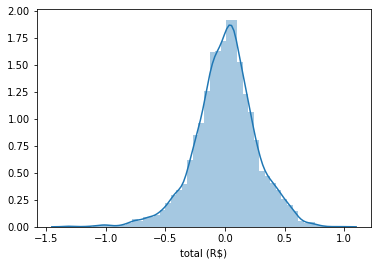

In [101]:
pcaMod = PCA(6)
pcaMod.fit(X_train)
g_train = X_train @ pcaMod.components_.T
linMod = LinearRegression(fit_intercept = True)
linMod.fit(X = g_train, y = y_train)
g_test = X_test @ pcaMod.components_.T
print("Coefficient: ")
print(linMod.intercept_, linMod.coef_)
print("MSE: ")
print(np.mean(np.square(linMod.predict(g_test) - y_test)))
print("Variance: ")
print(np.var(linMod.predict(g_test) - y_test))
print("Variance on test set: ")
print(np.var(y_test))
print("R^2: ")
print(1- np.var(linMod.predict(g_test) - y_test) / np.var(y_test))
sns.distplot(linMod.predict(g_test) - y_test)

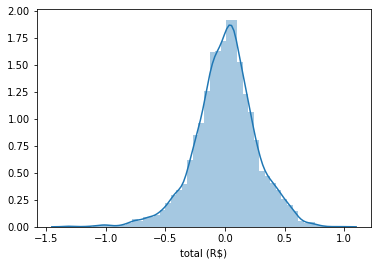

In [103]:
##Custom implementation of PCR
from PCR import pcr
p = pcr(X_test.to_numpy(), default = False,\
        components = pcaMod.components_, coef = linMod.coef_, intercept = linMod.intercept_)
sns.distplot(p.predict() - y_test)